In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense
from keras.layers import Flatten

In [67]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv',delimiter=',')

X_test = np.loadtxt('input_test.csv', delimiter=',')
Y_test = np.loadtxt('labels_test.csv', delimiter=',')


In [68]:
X_train = X_train.reshape(len(X_train),100,100,3)
X_test = X_test.reshape(len(X_test),100,100,3)

Y_train = Y_train.reshape(len(Y_train),1)
Y_test = Y_test.reshape(len(Y_test),1)

X_train = X_train/255
X_test = X_test/255

In [69]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2000, 100, 100, 3)
(2000, 1)
(400, 100, 100, 3)
(400, 1)


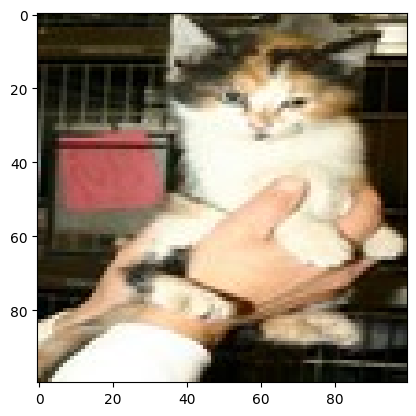

In [70]:
import random
index = random.randint(0, len(X_train))
plt.imshow(X_train[index])

In [94]:
from tensorflow.keras.layers import Dropout
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = (100,100,3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

c:\Users\delta\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [95]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape = (100,100,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
Dropout(0.5)
model.add(Dense(1, activation='sigmoid'))

In [96]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience = 5, restore_best_weights=True)

In [97]:
model.fit(X_train, Y_train, epochs = 20, batch_size=64, validation_data=(X_test,Y_test))

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 388ms/step - accuracy: 0.4976 - loss: 1.0044 - val_accuracy: 0.5600 - val_loss: 0.6900
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 368ms/step - accuracy: 0.5895 - loss: 0.6847 - val_accuracy: 0.5025 - val_loss: 0.8246
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 367ms/step - accuracy: 0.5785 - loss: 0.6940 - val_accuracy: 0.5375 - val_loss: 0.6807
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 367ms/step - accuracy: 0.6629 - loss: 0.6264 - val_accuracy: 0.6625 - val_loss: 0.6205
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 370ms/step - accuracy: 0.6906 - loss: 0.5806 - val_accuracy: 0.7050 - val_loss: 0.5994
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 367ms/step - accuracy: 0.7653 - loss: 0.4814 - val_accuracy: 0.7000 - val_loss: 0.6518
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 370ms/step - accuracy: 0.8289 - loss: 0.3963 - val_accuracy: 0.6700 - val_loss: 0.7144
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 364ms/step - accuracy: 0.8634 - loss: 0.3127 - val_accu

In [100]:
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.6754 - loss: 2.0791


[1.8522671461105347, 0.6924999952316284]

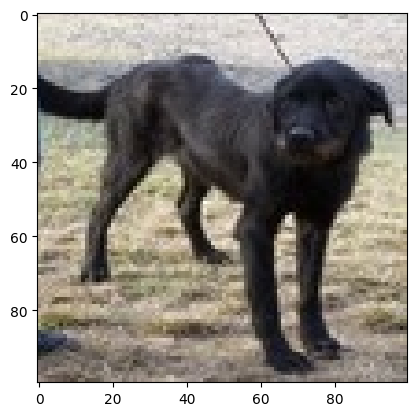

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Dog


In [118]:
idx2 = random.randint(0, len(X_test))
plt.imshow(X_test[idx2])
plt.show()

y_pred = model.predict(X_test[idx2,:].reshape(1,100,100,3))
y_pred = y_pred > 0.5
if(y_pred == 0):
    print("Dog")
else:
    print("Cat")